# PUCRS - Pós-Graduação em Ciência de Dados 2nd Edição

## Aprendizado Não-Supervisionado

### Trabalho 3 - Grupo 5 (Rafael, Esmael, Camila, Gabriel)

-----------------------

### Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando os dados

Temos os dados entre 2015 e 2020 disponíveis. Vamos iniciar analisando o ano de 2020.

In [2]:
df=pd.read_csv('2020.csv')
original=df.copy()
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


Percebemos que o dataset possui um registro para cada país, por ano. No caso acima estamos com o dataframe de 2020. São muitas colunas e algumas explicativas que não ajudarão muito na análise. Não há valores nulos ou inválidos, então a limpeza será somente na remoção de colunas irrelevantes.

## Limpeza do dataset

Depois da analizar o dataset, selecionamos as colunas mais relevantes

In [3]:
main_feat = ['Logged GDP per capita','Social support','Freedom to make life choices','Healthy life expectancy','Generosity','Perceptions of corruption','Ladder score']
df = df[main_feat]
df.head()

,Logged GDP per capita,Social support,Freedom to make life choices,Healthy life expectancy,Generosity,Perceptions of corruption,Ladder score
0,10.639267,0.954330,0.949172,71.900825,-0.059482,0.195445,7.8087
1,10.774001,0.955991,0.951444,72.402504,0.066202,0.168489,7.6456
2,10.979933,0.942847,0.921337,74.102448,0.105911,0.303728,7.5599
3,10.772559,0.974670,0.948892,73.000000,0.246944,0.711710,7.5045
4,11.087804,0.952487,0.955750,73.200783,0.134533,0.263218,7.4880


## Correlações entre features

### Heatmap

Decidimos procurar correlações fortes entre duplas de features. Conseguiremos isso com um heatmap de todas as features mais importantes.

<AxesSubplot:>

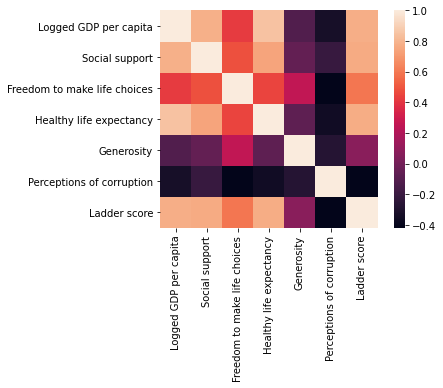

In [4]:
corrmat = df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

### Scatter Plot

Abaixo mais uma tentativa de enxergar possíveis agrupamentos em plotagens de features em duplas. Agora com gráficos de pontos.

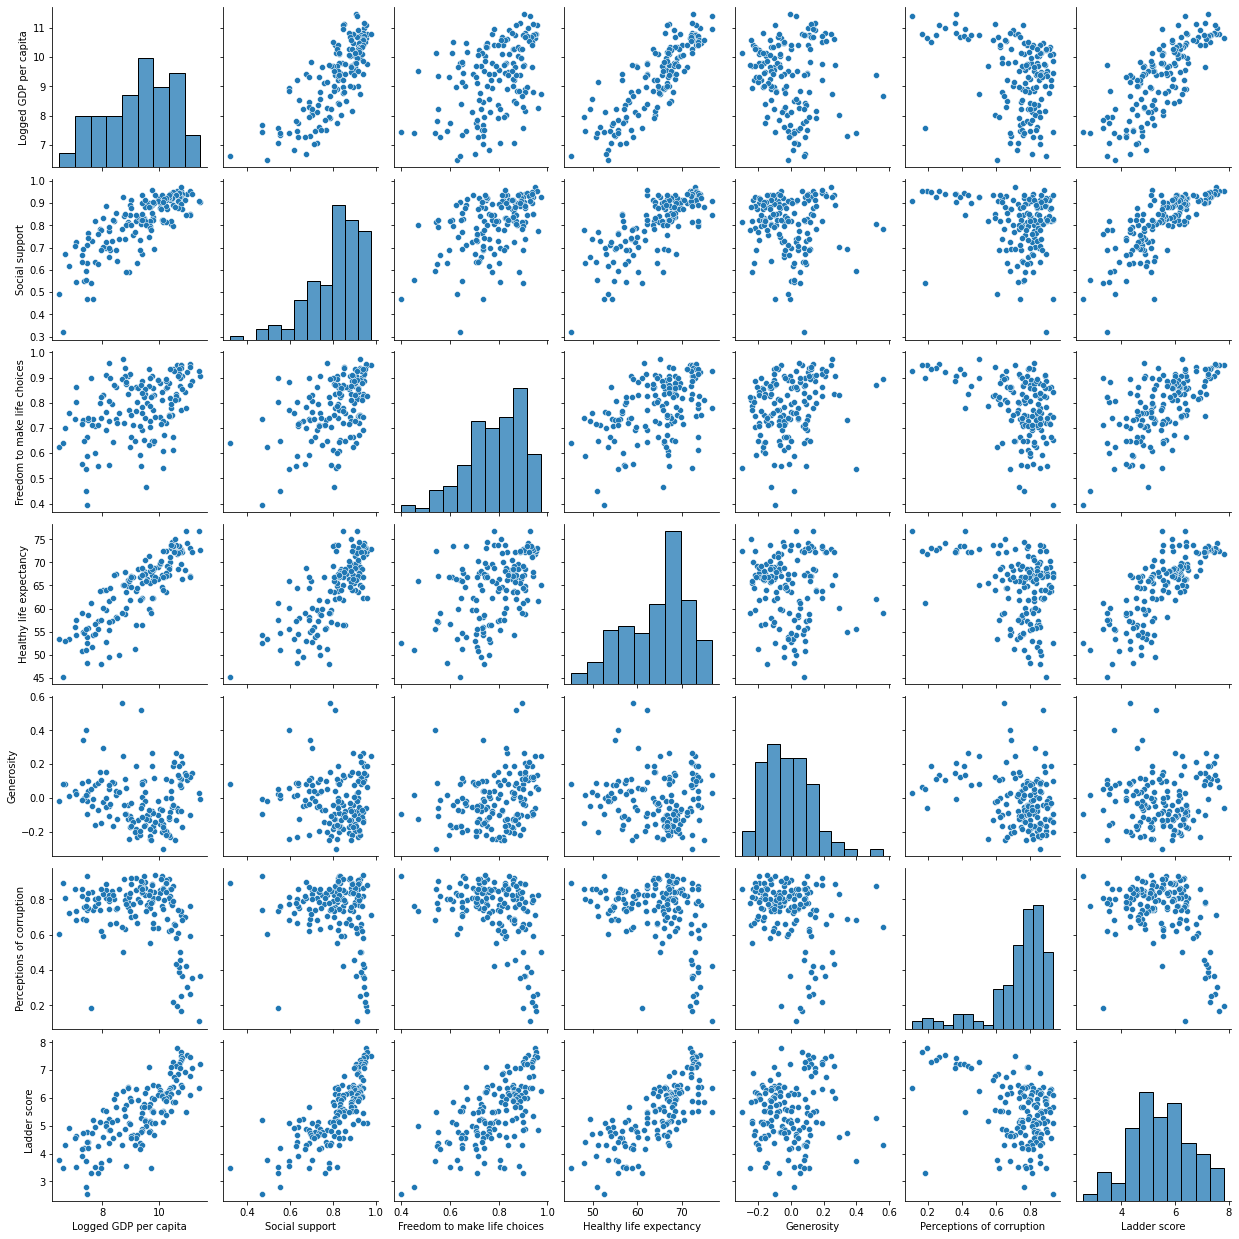

In [5]:
sns.pairplot(df)

Text(0.5, 1.0, 'Top 20 in Corruption')

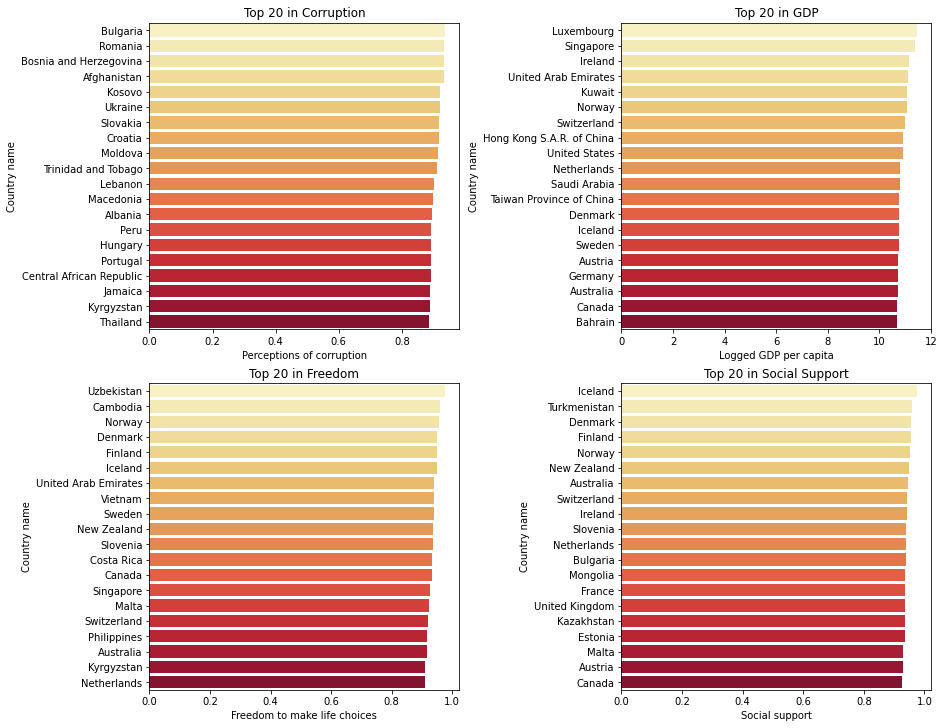

In [6]:
df_c = original.copy()
fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(13,10))
topx = 20
sns.barplot(x='Perceptions of corruption', y='Country name', data=df_c.nlargest(topx,'Perceptions of corruption'), ax=axes[0][0], palette='YlOrRd')
sns.barplot(x='Freedom to make life choices' ,y='Country name', data=df_c.nlargest(topx,'Freedom to make life choices'),ax=axes[1][0], palette='YlOrRd')
sns.barplot(x='Logged GDP per capita' ,y='Country name', data=df_c.nlargest(topx,'Logged GDP per capita'), ax=axes[0][1], palette='YlOrRd')
sns.barplot(x='Social support', y='Country name', data=df_c.nlargest(topx,'Social support'), ax=axes[1][1], palette='YlOrRd')

axes[1][1].set_title('Top {} in Social Support'.format(topx))
axes[1][0].set_title('Top {} in Freedom'.format(topx))
axes[0][1].set_title('Top {} in GDP'.format(topx))
axes[0][0].set_title('Top {} in Corruption'.format(topx))

## Encontrando clusters

Vamos iniciar com duas features que parecem estar fortemente relacionadas: Social Support e Life Expectancy. <br> Abaixo está o scatter plot de todos os país.

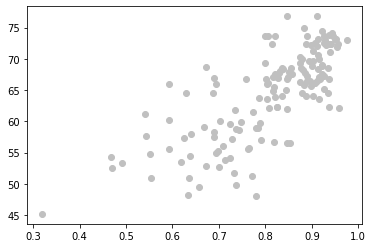

In [7]:
X = df[['Social support', 'Healthy life expectancy']]
plt.scatter(X["Social support"], X["Healthy life expectancy"], c='silver')
plt.show()

### K-Means

Agora vamos rodar o K-Means para separar as amostras em 3 clusters.

CENTROIDS: 

[[ 0.83933301 65.96006045]
 [ 0.67951482 55.15618405]
 [ 0.90364561 72.48444895]]



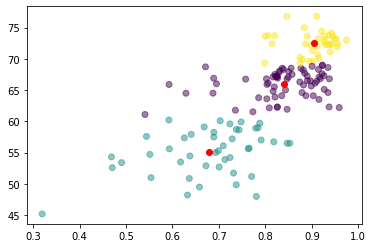

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print("CENTROIDS: \n\n{}\n".format(centroids))

plt.scatter(X['Social support'], X['Healthy life expectancy'], c=kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

Abaixo vamos analisar os 3 clulsters encontrados. Para isso vamos listar os países que se encontram nos clusters com os dados correspondentes e ordená-los, para exibir os top 10 de cada cluster. 

**Separando os clusters em dataframes.**

In [9]:
import math

df_k = original.copy()

feats = ['Country name', 'Social support', 'Healthy life expectancy', 'Ladder score']
df_k = df_k[feats]
df_k['Cluster'] = kmeans.labels_

# Clusters - Dataframes
df_k_0 = df_k[ df_k['Cluster']==0 ]
df_k_1 = df_k[ df_k['Cluster']==1 ]
df_k_2 = df_k[ df_k['Cluster']==2 ]

# função para pintar celulas com valor Max em amarelo
def style_max(s):
    is_max = s == s.max()
    return ['background-color: yellow; color: black' if v else '' for v in is_max]

**CLUSTER 3 - Top 10** <br> Valores MAX em amarelo. Ordenado por Score geral.

In [10]:
df_k_2 = df_k_2.sort_values(by='Ladder score', ascending=False)
df_k_2 = df_k_2.head(10).style.apply(style_max, subset=pd.IndexSlice[:, ['Social support', 'Healthy life expectancy', 'Ladder score']])
df_k_2

,Country name,Social support,Healthy life expectancy,Ladder score,Cluster
0,Finland,0.954330,71.900825,7.808700,2
1,Denmark,0.955991,72.402504,7.645600,2
2,Switzerland,0.942847,74.102448,7.559900,2
3,Iceland,0.974670,73.000000,7.504500,2
4,Norway,0.952487,73.200783,7.488000,2
5,Netherlands,0.939139,72.300919,7.448900,2
6,Sweden,0.926311,72.600769,7.353500,2
7,New Zealand,0.949119,73.202629,7.299600,2
8,Austria,0.928046,73.002502,7.294200,2
9,Luxembourg,0.906912,72.599998,7.237500,2


**CLUSTER 2 - Top 10** <br> Valores MAX em amarelo. Ordenado por Score geral.

In [11]:
df_k_1 = df_k_1.sort_values(by='Ladder score', ascending=False)
df_k_1 = df_k_1.head(10).style.apply(style_max, subset=pd.IndexSlice[:, ['Social support', 'Healthy life expectancy', 'Ladder score']])
df_k_1

,Country name,Social support,Healthy life expectancy,Ladder score,Cluster
65,Pakistan,0.689062,58.253136,5.693300,1
84,Ivory Coast,0.658049,49.503773,5.233300,1
85,Benin,0.468671,54.312466,5.216000,1
87,Congo (Brazzaville),0.640228,57.924480,5.194400,1
90,Ghana,0.728601,57.203987,5.148000,1
97,Cameroon,0.700386,52.704941,5.084900,1
100,Senegal,0.723616,59.599152,4.980800,1
101,Guinea,0.637573,54.467800,4.949300,1
102,Niger,0.617435,53.500095,4.909600,1
103,Laos,0.737502,58.709923,4.888600,1


**CLUSTER 1 - Top 10** <br> Valores MAX em amarelo. Ordenado por Score geral.

In [12]:
df_k_0 = df_k_0.sort_values(by='Ladder score', ascending=False)
df_k_0 = df_k_0.head(10).style.apply(style_max, subset=pd.IndexSlice[:, ['Social support', 'Healthy life expectancy', 'Ladder score']])
df_k_0

,Country name,Social support,Healthy life expectancy,Ladder score,Cluster
17,United States,0.914219,68.299500,6.939600,0
20,United Arab Emirates,0.849181,67.082787,6.790800,0
23,Mexico,0.838665,68.299026,6.465000,0
25,Uruguay,0.922811,69.002548,6.440100,0
26,Saudi Arabia,0.874067,66.305145,6.406500,0
28,Guatemala,0.816621,64.808945,6.398900,0
31,Brazil,0.896724,66.480164,6.375600,0
33,El Salvador,0.806092,66.108261,6.348300,0
34,Kosovo,0.820727,63.885555,6.325200,0
36,Slovakia,0.922494,68.906342,6.280600,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=602de22f-39fb-4f1e-a094-63af008d5bab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>